In [ ]:
!unzip "//content/drive/MyDrive/dogcat(1).zip" -d "/content/drive/MyDrive/"

# Dropout and Regularisation in CNN 

Regularisation technique in ANN deactives some percentage of neurons while training in order to avoid a bias in our training. In CNN dropout make the pixels black for different parts of the image. This is called deactivation of pixels in image. This is a general intuition of the dropout. This is not the very theoretical idea. 

Now the question comes on where to place a dropout layer 

1. Before Flatten (if you are planning to use it before flatenning, then we should use it atleast 3-4 layers before flattening because I don't want to loose any of my features once they are trained already before the flatten layer) 
2. After the Flattening Layer (Most of the research have suggested that placing the dropout layer after faltenning gives better results)


Also do not add a drop out layer at the top because in the initial layers we need to extract as many features as we can and if we use a dropout layer there then we will be loosing some information. Also do not use in any of the transition layers in your CNN. Always keep dropout between 10-20%. Not more than this otherwise we will be loosing information. 

Research Paper : Improved Regularisation of CNN (https://arxiv.org/pdf/1708.04552.pdf)


In [2]:
!pip install tensorflow 

     |████████████████████████████████| 462 kB 5.0 MB/s 


In [3]:
!pip install keras

In [7]:
# Lets Make some imports 
from keras.models import Sequential 
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

In [23]:
# Initialise the CNN 
classifier = Sequential()

In [24]:
# Step 1 : Convolution Layer 
classifier.add(Conv2D(32, (3,3), input_shape = (64,64,3), activation = "relu"))
# Step 2 : Max Pooling Layer 
classifier.add(MaxPooling2D(pool_size = (2,2)))
# Step 3 : Convolution Layer 
classifier.add(Conv2D(32, (3,3), activation = "relu"))
# Step 4 : Max Pooling Layer 
classifier.add(MaxPooling2D(pool_size = (2,2)))
# Step 5 : Dropout Layer 
classifier.add(Dropout(0.2))
# Step 6 : Convolution Layer 1.0 
classifier.add(Conv2D(32, (3,3), activation = "relu"))
# Step 7 : Convolution Layer 1.0
classifier.add(Conv2D(32, (3,3), activation = "relu"))
# Step 8 : Max Pooling Layer 
classifier.add(MaxPooling2D(pool_size = (2,2)))
# Step 9 : Flattening 
classifier.add(Flatten())
# Step 10 : Full Connection 
classifier.add(Dense(units = 128, activation = "relu"))
classifier.add(Dense(units = 1, activation = "sigmoid"))

classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 12, 12, 32)       

In [25]:
# Compiling the CNN network 
classifier.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

# Data Augmentation 

Data Augmentation is needed when we are provided with lesser amount of data and we need to generate the psudo data. It is of two types: 

1. Runtime Data Augmentation
2. Pre-Processed

Keras is giving you power to do the data augmentation in the runtime. In runtime we cannot control every variable but we can do that pre-processed. 

Checkout this library : https://augmentor.readthedocs.io/en/master/

Data Augmentation using Random Image cropping and Patching (https://arxiv.org/pdf/1811.09030.pdf)

Checkout : https://albumentations.ai/



In [26]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory("/content/drive/MyDrive/dogcat/cats_and_dogs_filtered/train",
                                                 target_size = (64,64),
                                                 batch_size = 32,
                                                 class_mode = "binary")

test_set = test_datagen.flow_from_directory("/content/drive/MyDrive/dogcat/cats_and_dogs_filtered/validation",
                                            target_size = (64,64),
                                            batch_size = 32,
                                            class_mode = "binary")

model = classifier.fit_generator(training_set,
                                 steps_per_epoch = 8000,
                                 epochs = 1, 
                                 validation_data = test_set,
                                 validation_steps = 2000)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


8000/8000 [==============================] - 31s 4ms/step - loss: 0.6947 - accuracy: 0.5085 - val_loss: 0.6908 - val_accuracy: 0.5700


In [27]:
classifier.save("/content/drive/MyDrive/dogcat/model.h5")
print("Save model to disk")

Save model to disk


In [28]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img("/content/drive/MyDrive/dogcat/inputImage.jpg", target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)
result = classifier.predict(test_image)


In [29]:
result

array([[0.99985135]], dtype=float32)

In [30]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

In [31]:
if result[0][0] == 1 :
  prediction = "dog"
  print(prediction)
else: 
  prediction = "cat"
  print(prediction)

cat


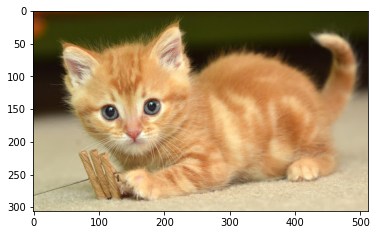

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
img = mpimg.imread("/content/drive/MyDrive/dogcat/inputImage.jpg")
imgplot = plt.imshow(img)
plt.show()